In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow

In [3]:
#2.1

datagen = ImageDataGenerator(zoom_range=0, horizontal_flip=True, rescale=1.0/255.0, width_shift_range=0, height_shift_range=0)
train_generator = datagen.flow_from_directory("xray_dataset_covid19/train", target_size=(64,64), class_mode='binary',batch_size=32)
test_generator = datagen.flow_from_directory("xray_dataset_covid19/test", target_size=(64,64), class_mode='binary', batch_size=32)
print(train_generator)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [21]:
#2.2
earlystop=EarlyStopping(patience=6)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='adam', loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_generator, epochs=20, verbose=1, validation_data=test_generator)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_6 (Flatten)         (None, 9216)             

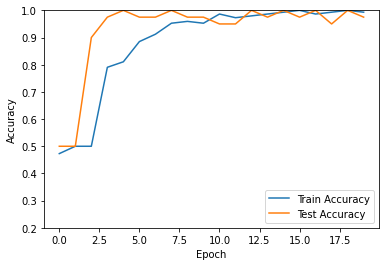

In [22]:
#2.3
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

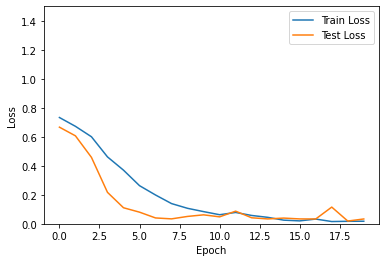

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='upper right')